In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
train.Electrical.mode()[0]

'SBrkr'

Handling missing values on Electrical columns || Modus

In [8]:
train.Electrical = train.Electrical.fillna(value='SBrkr')

In [9]:
train.isnull().sum()[train.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [10]:
train.dtypes[train.dtypes == 'int64']

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

Handling missing values on Alley || Data Description ada

In [11]:
train.Alley = train.Alley.fillna(value='None')

train.YearBuilt == train.GarageYrBlt || Tahun bangun garasi disamain sama tahun bangun rumah

In [12]:
train.GarageYrBlt = train.GarageYrBlt.fillna(value=train.YearBuilt)

In [13]:
train.GarageYrBlt.iloc[[39]]

39    1955.0
Name: GarageYrBlt, dtype: float64

Handling missing values on LotFrontage

In [16]:
train.LotFrontage.unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [17]:
cobadulu = train[['LotFrontage','LotArea']]

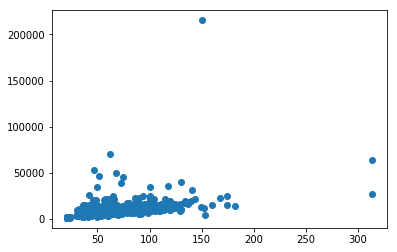

In [18]:
plt.scatter(x='LotFrontage',y='LotArea',data=cobadulu)

In [19]:
cobadulu.corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


In [20]:
train.LotFrontage = train.LotFrontage.fillna(value=0)

In [21]:
train.isnull().sum()[train.isnull().sum()>0]

MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Handling missing values on MasVnrType | Data Description ada

In [22]:
train.MasVnrType = train.MasVnrType.fillna(value='None')

In [23]:
train.isnull().sum()[train.isnull().sum()>0]

MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Handling missing values on MasVnrArea| Kalo Veneer Type nya none, ya luasnya none

In [24]:
train.MasVnrArea = train.MasVnrArea.fillna(value=0)

In [25]:
train.isnull().sum()[train.isnull().sum()>0]

BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Handling missing values on BsmtQual,BsmtCond,BsmtExposure,Fintype1,Fintype2 || Ada di Description

In [26]:
train.BsmtQual = train.BsmtQual.fillna(value='None')

In [27]:
train.BsmtCond = train.BsmtCond.fillna(value='None')

In [28]:
train.BsmtExposure = train.BsmtExposure.fillna(value='None')

In [29]:
train.BsmtFinType1 = train.BsmtFinType1.fillna(value='None')

In [30]:
train.BsmtFinType2 = train.BsmtFinType2.fillna(value='None')

Handling missing values on FireplaceQu || Ada di Description

In [31]:
train.loc[:, "FireplaceQu"] = train.loc[:, "FireplaceQu"].fillna('None')

In [32]:
train.loc[:, "GarageCond"] = train.loc[:, "GarageCond"].fillna('None')
train.loc[:, "GarageQual"] = train.loc[:, "GarageQual"].fillna('None')
train.loc[:, "GarageFinish"] = train.loc[:, "GarageFinish"].fillna('None')
train.loc[:, "GarageType"] = train.loc[:, "GarageType"].fillna('None')

In [33]:
train.loc[:, "MiscFeature"] = train.loc[:, "MiscFeature"].fillna('None')
train.loc[:, "Fence"] = train.loc[:, "Fence"].fillna('None')
train.loc[:, "PoolQC"] = train.loc[:, "PoolQC"].fillna('None')

In [34]:
train.isnull().sum()[train.isnull().sum()>0]

Series([], dtype: int64)

Scaled

In [35]:
from sklearn.preprocessing import StandardScaler
numerik_f=list(pd.DataFrame(train.dtypes[train.dtypes != 'object']).index)
df_numerik = train[numerik_f]
df_num = df_numerik.drop(['Id'],1)
scaler = StandardScaler()
scaler.fit(df_num)
scaler.mean_
scaler.transform(df_num)
train2 = pd.DataFrame(scaler.transform(df_num),columns=numerik_f[1:])

Scaled Heatmap

          0         1         2         3         4         5
0  1.000685  0.100808  0.105082  0.076723 -0.009319  0.209768
1  0.100808  1.000685  0.103391  0.214250  0.111246  0.264024
2  0.105082  0.103391  1.000685  0.261435 -0.071379  0.472938
3  0.076723  0.214250  0.261435  1.000685 -0.050152  0.386685
4 -0.009319  0.111246 -0.071379 -0.050152  1.000685 -0.011386
5  0.209768  0.264024  0.472938  0.386685 -0.011386  1.000685


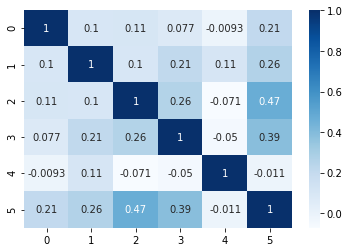

In [36]:
import seaborn as sns
from sklearn import preprocessing
from matplotlib.pyplot import cm

std_scale=preprocessing.StandardScaler().fit(train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]])
df_std=std_scale.transform(train[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

          0         1         2         3         4         5         6  \
0  1.000685  0.415644  0.318205  0.004472  0.028186  0.240422  0.250819   
1  0.415644  1.000685  0.820092 -0.174632 -0.033268  0.455180  0.285768   
2  0.318205  0.820092  1.000685 -0.202785 -0.014250  0.566412  0.409797   
3  0.004472 -0.174632 -0.202785  1.000685  0.063396  0.687972  0.616845   
4  0.028186 -0.033268 -0.014250  0.063396  1.000685  0.134775  0.131275   
5  0.240422  0.455180  0.566412  0.687972  0.134775  1.000685  0.826055   
6  0.250819  0.285768  0.409797  0.616845  0.131275  0.826055  1.000685   
7  0.214626  0.614001  0.606267  0.319553 -0.025624  0.709110  0.534089   

          7  
0  0.214626  
1  0.614001  
2  0.606267  
3  0.319553  
4 -0.025624  
5  0.709110  
6  0.534089  
7  1.000685  


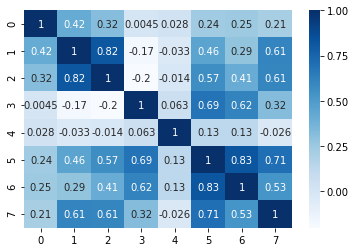

In [37]:
std_scale=preprocessing.StandardScaler().fit(train[["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
              "LowQualFinSF","GrLivArea","TotRmsAbvGrd","SalePrice"]])
df_std=std_scale.transform(train[["BsmtUnfSF","TotalBsmtSF","1stFlrSF","2ndFlrSF",
              "LowQualFinSF","GrLivArea","TotRmsAbvGrd","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

          0         1         2         3         4         5
0  1.000685  0.300995  0.269326  0.200156  0.169521  0.467249
1  0.300995  1.000685  0.883080  0.226497  0.213716  0.640848
2  0.269326  0.883080  1.000685  0.224820  0.241600  0.623859
3  0.200156  0.226497  0.224820  1.000685  0.058701  0.324636
4  0.169521  0.213716  0.241600  0.058701  1.000685  0.316073
5  0.467249  0.640848  0.623859  0.324636  0.316073  1.000685


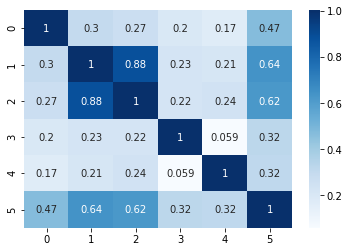

In [38]:
std_scale=preprocessing.StandardScaler().fit(train[["Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]])
df_std=std_scale.transform(train[["Fireplaces","GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

          0         1         2         3         4         5
0  1.000685 -0.037331 -0.082921  0.054240  0.018373 -0.128666
1 -0.037331  1.000685 -0.031457 -0.007997  0.000354  0.044614
2 -0.082921 -0.031457  1.000685  0.051343  0.031968  0.111523
3  0.054240 -0.007997  0.051343  1.000685  0.029689  0.092467
4  0.018373  0.000354  0.031968  0.029689  1.000685 -0.021204
5 -0.128666  0.044614  0.111523  0.092467 -0.021204  1.000685


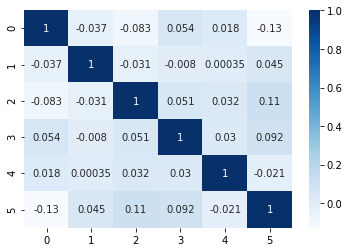

In [39]:
std_scale=preprocessing.StandardScaler().fit(train[["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]])
df_std=std_scale.transform(train[["EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MiscVal","SalePrice"]])

data=pd.DataFrame(df_std)
data.head()

print(data.cov())
sns.heatmap(data.cov(),cmap=cm.Blues,annot=True) # korelasi atau hubungan antar variabel
plt.show()

In [40]:
train2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-0.872563,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0.073375,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0.309859,0.068587,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0.073375,0.761179,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [41]:
kategorik=list(pd.DataFrame(train.dtypes[train.dtypes == 'object']).index)
# kategorik.extend(numerik_k)
kategorik
traine=train[kategorik]
traine2=pd.get_dummies(traine,drop_first=True)
traine.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


In [42]:
traindah = pd.concat([traine2,train2],axis=1)

In [43]:
traindah.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,1,0,0,0,1,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,0,0,1,0,1,1,0,0,0,1,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,0,0,1,0,1,1,0,0,0,0,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,0,0,1,0,1,1,0,0,0,0,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,0,0,1,0,1,1,0,0,0,0,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


In [73]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [92]:
X=traindah.drop(['SalePrice'],axis=1)
# X=pd.concat([traindah[["TotalBsmtSF",
# "GrLivArea",
# "GarageCars"]],traine2],axis=1)
# X=traindah[["TotalBsmtSF",
# "GrLivArea",
# "GarageCars"]]
Y=train['SalePrice']
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3,random_state=123)

In [93]:
lm=Ridge(alpha=0.5)

In [94]:
lm.fit(train_x,train_y)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [95]:
ypred = lm.predict(test_x)

In [96]:
train_y.head()

376    148000
250     76500
228    125000
40     160000
428    195400
Name: SalePrice, dtype: int64

In [97]:
np.sqrt(mean_squared_error(test_y,ypred))

28426.25512815208

In [98]:
test = pd.read_csv('test.csv')

In [99]:
test2 = test[["TotalBsmtSF",
"GrLivArea",
"GarageCars"]]

In [100]:
test2.TotalBsmtSF = test2.TotalBsmtSF.fillna(test2.TotalBsmtSF.mean())

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [101]:
test2.GarageCars = test2.GarageCars.fillna(test2.GarageCars.mean())

C:\Users\stezar059244\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [102]:
test2.isnull().sum()

TotalBsmtSF    0
GrLivArea      0
GarageCars     0
dtype: int64

In [121]:
scaler = StandardScaler()
scaler.fit(test2)
scaler.mean_
scaler.transform(test2)
testdah = pd.DataFrame(scaler.transform(test2),columns=["TotalBsmtSF",
"GrLivArea",
"GarageCars"])
X.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,1,0,1,1,0,0,0,1,...,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0,0,1,0,1,1,0,0,0,1,...,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0,0,1,0,1,1,0,0,0,0,...,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0,0,1,0,1,1,0,0,0,0,...,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0,0,1,0,1,1,0,0,0,0,...,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777


In [116]:
kategorik=list(pd.DataFrame(test.dtypes[test.dtypes == 'object']).index)
# kategorik.extend(numerik_k)
kategorik
tata=test[kategorik]
tata=pd.get_dummies(tata,drop_first=True)
tata.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [119]:
testsu = pd.concat([tata,testdah],axis=1)
testsu.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,TotalBsmtSF,GrLivArea,GarageCars
0,0,1,0,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,-0.370808,-1.215588,-0.988013
1,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0.639144,-0.323539,-0.988013
2,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,-0.266876,0.294508,0.301623
3,0,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,-0.271395,0.243004,0.301623
4,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,1,0,0.528434,-0.424487,0.301623


In [118]:
predict=lm.predict(testsu)

ValueError: shapes (1459,194) and (259,) not aligned: 194 (dim 1) != 259 (dim 0)

In [58]:
predict = pd.DataFrame(predict)

In [59]:
predict.columns=['SalePrice']

In [60]:
predict.head()

,SalePrice
0,106526.949867
1,157744.112804
2,192405.476927
3,190619.644594
4,186165.879630


In [61]:
predicted = pd.concat([test.Id,predict],1)

In [62]:
predicted.to_csv('D:/result2.csv',index=False,header=True)

In [113]:
data_gabung = pd.concat([test,train],axis=0)

,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_NoSeWa
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0
